In [42]:
import json
import requests

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df=pd.read_json("provinces.json",lines=False)


In [45]:
df1=pd.read_json("case_by_province.json",lines=False)


In [46]:
frames = [df, df1]
result = pd.concat(frames)

In [47]:
result.head()

,txn_date,province,new_case,total_case,update_date
0,2020-01-12,กระบี่,0,0,NaN
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
2,2020-01-12,กาญจนบุรี,0,0,NaN
3,2020-01-12,กาฬสินธุ์,0,0,NaN
4,2020-01-12,กำแพงเพชร,0,0,NaN


In [48]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41418 entries, 0 to 11075
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   txn_date     41418 non-null  object
 1   province     41418 non-null  object
 2   new_case     41418 non-null  int64 
 3   total_case   41418 non-null  int64 
 4   update_date  11076 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [49]:
print(pd.__version__)

1.3.2


In [50]:
daily_case = result.groupby('txn_date').sum()
daily_case.head()

,new_case,total_case
txn_date,,
2020-01-12,1,1
2020-01-17,1,2
2020-01-22,2,4
2020-01-24,1,5
2020-01-25,1,6


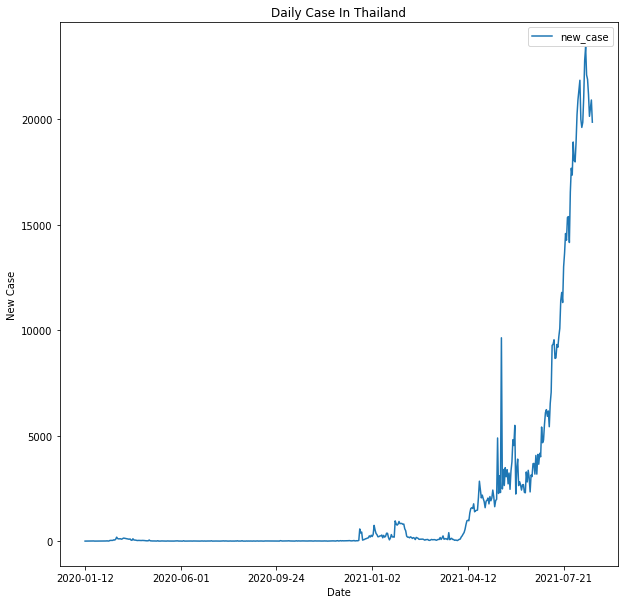

In [51]:
daily_case.plot(y='new_case',
                figsize = (10,10),xlabel="Date",ylabel="New Case",title="Daily Case In Thailand")

In [52]:
bangkok = result[result['province']=='กรุงเทพมหานคร']
bangkok


,txn_date,province,new_case,total_case,update_date
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
79,2020-01-17,กรุงเทพมหานคร,1,2,NaN
157,2020-01-22,กรุงเทพมหานคร,1,3,NaN
235,2020-01-24,กรุงเทพมหานคร,0,3,NaN
313,2020-01-25,กรุงเทพมหานคร,1,4,NaN
...,...,...,...,...,...
10687,2021-08-16,กรุงเทพมหานคร,4337,245126,2021-08-19 07:39:31
10765,2021-08-17,กรุงเทพมหานคร,4404,249530,2021-08-19 07:39:31
10843,2021-08-18,กรุงเทพมหานคร,4165,253695,2021-08-19 07:39:31
10921,2021-08-19,กรุงเทพมหานคร,4410,258105,2021-08-19 07:39:31


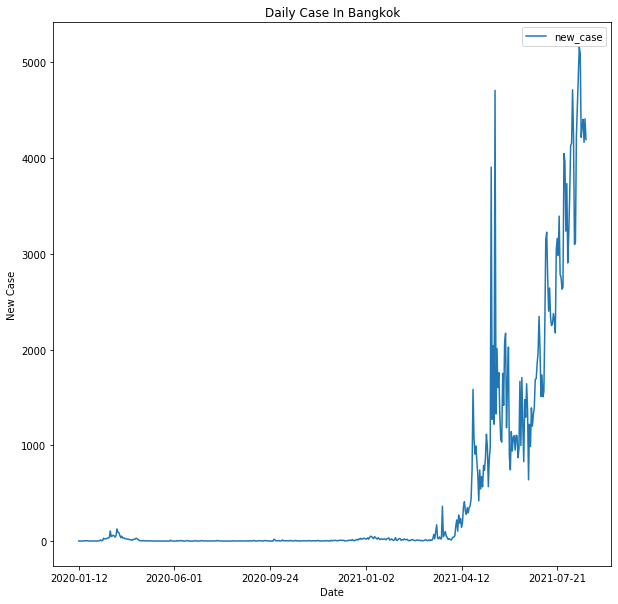

In [53]:

bangkok.plot(x='txn_date', y='new_case',
                figsize = (10,10),
                xlabel="Date",
                ylabel="New Case",
                title="Daily Case In Bangkok")

In [54]:
thailand_2021 = result[result['txn_date']>'2021-03-31']
daily_2021 = thailand_2021.groupby('txn_date').sum()
daily_2021.head()

,new_case,total_case
txn_date,,
2021-04-01,26,28889
2021-04-02,58,28947
2021-04-03,84,29031
2021-04-04,96,29127
2021-04-05,194,29321


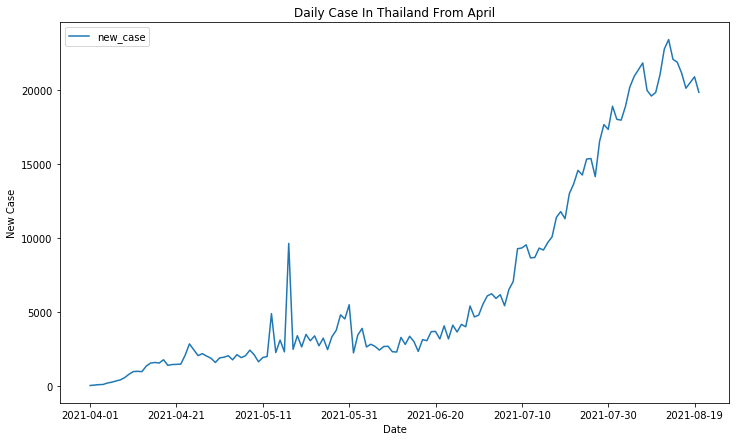

In [55]:
daily_2021.plot(y='new_case',
                figsize = (12,7),
                xlabel="Date",
                ylabel="New Case",
                title="Daily Case In Thailand From April")

In [56]:
daily_2021 = thailand_2021.groupby('province')
bangkok_2021 = daily_2021.get_group('กรุงเทพมหานคร')
bangkok_2021

,txn_date,province,new_case,total_case,update_date
1,2021-04-01,กรุงเทพมหานคร,11,4855,2021-08-19 07:39:31
79,2021-04-02,กรุงเทพมหานคร,24,4879,2021-08-19 07:39:31
157,2021-04-03,กรุงเทพมหานคร,41,4920,2021-08-19 07:39:31
235,2021-04-04,กรุงเทพมหานคร,41,4961,2021-08-19 07:39:31
313,2021-04-05,กรุงเทพมหานคร,55,5016,2021-08-19 07:39:31
...,...,...,...,...,...
10687,2021-08-16,กรุงเทพมหานคร,4337,245126,2021-08-19 07:39:31
10765,2021-08-17,กรุงเทพมหานคร,4404,249530,2021-08-19 07:39:31
10843,2021-08-18,กรุงเทพมหานคร,4165,253695,2021-08-19 07:39:31
10921,2021-08-19,กรุงเทพมหานคร,4410,258105,2021-08-19 07:39:31


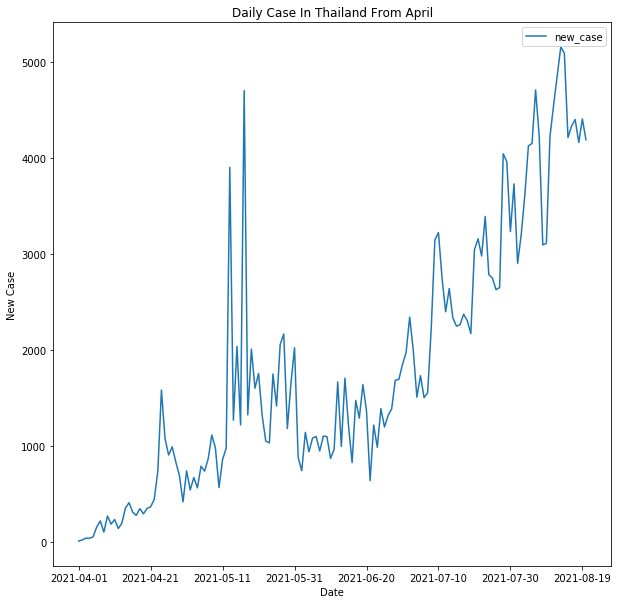

In [57]:
bangkok_2021.plot(x='txn_date',y='new_case',
                figsize = (10,10),
                xlabel="Date",
                ylabel="New Case",
                title="Daily Case In Thailand From April")